In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import cv2
import os

In [2]:
_path = '/Users/cdima/Applied ML/Module13/data'

In [3]:
#1

#Train Data

X_tr, y_tr, X_ts, y_ts = [], [], [], []


import cv2
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for label in CNAMES:
     path = _path + '/seg_train/seg_train/' + label
     for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
         X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
         y_tr += [CNAMES.index(label)]

In [4]:
#Test Data

import cv2
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for label in CNAMES:
     path = _path + '/seg_test/seg_test/' + label
     for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
         X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
         y_ts += [CNAMES.index(label)]


In [5]:
X_tr[0][0][0]

array([245, 247, 247], dtype=uint8)

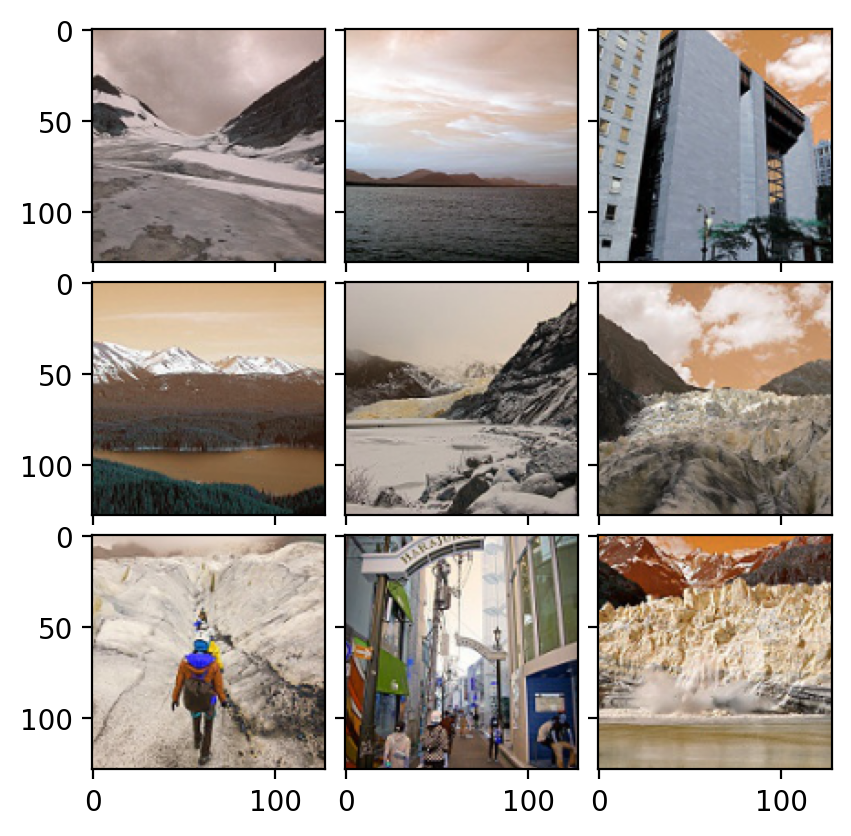

In [6]:
import random as rand
from mpl_toolkits.axes_grid1 import ImageGrid

rand_images = rand.sample(X_tr, 10)

fig = plt.figure(dpi=200)
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.1)

for ax, im in zip(grid, rand_images):
    ax.imshow(im)

plt.show()

In [7]:
#to get the channels there are 3 color channels

len(X_tr[0][0][0])

3

In [8]:
#2 Convert to numpy array

X_train=np.array(X_tr, dtype=np.float64)
y_train= np.array(y_tr)

X_test= np.array(X_ts, dtype=np.float64)
y_test= np.array(y_ts)

In [9]:
print(X_train.shape)

(14034, 128, 128, 3)


In [10]:
print(y_train.shape)

(14034,)


In [11]:
#Scale Data
X_train /= 255.0
X_test /= 255.0

#Get Min and Max Sanity Check to make sure its scaled
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))

print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))


Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [12]:
##3

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import tensorflow as tf
from tensorflow import keras


In [13]:
 print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1466.6492, shape=(), dtype=float32)


In [14]:
from keras.models import Sequential 


model = keras.Sequential()

In [15]:
model.add(keras.layers.Conv2D(180, kernel_size= (4 ,4), activation= 'relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, kernel_size= (4,4), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Flatten Layer
model.add(keras.layers.Flatten())

#Output Layers
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(6, activation= 'softmax'))

In [16]:

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 180)     8820      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 180)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        92192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [17]:
model.fit(X_train,y_train,epochs=2)

Epoch 1/2
439/439 [==============================] - 361s 815ms/step - loss: 1.3422 - accuracy: 0.4604
Epoch 2/2
439/439 [==============================] - 352s 801ms/step - loss: 1.0878 - accuracy: 0.5686


In [18]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy_score(y_test, y_pred)

94/94 [==============================] - 15s 153ms/step


0.5846666666666667

#4 To improve neural network performance 

One possible method we can try is to raise the number of epochs. Essentially, epochs are just when the neural network takes in the inputs, and if we create iterate and increase epochs each time than we can see if this changes the accuracy of the model since
it will pass its inputs through the nueral network more times.

Another method is to use hyper parameter tuning to change the optimization method, loss function, and even batch sizes. By using hyperparemter tuning, we are able to try out different hyperparameters that would result in a more accurate neural network
prediction, specifically we can fine tune the optimization methods and try out different combinations of parameters

Finally, Dropout methods can be used to essentially force the neural network to have trace different paths to get to each neuron. How dropout works is that essentially some neuron connections are removed (dropped) and as a result this changes up teh 
path of the neural network so that it can adapt to the new connections